In [1]:
#collaborating Filtering recommendation systems

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Loading the Cleaned E-Commerce Data of 23k Customers
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Subjectivity,Sentiment Label
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,Positive
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,Positive
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,Positive
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.178750,0.533125,Positive
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.133750,0.607778,Positive


In [4]:
# Calling the Variables from E-Commerce Data of 23k Customers
data = data[['Clothing ID', 'Age', 'Recommended IND', 'Review Text', 'Rating']]
data.dropna(subset=['Review Text'], inplace=True)
data.reset_index(drop=True, inplace=True)
data['Review Text'] = data['Review Text'].str.lower()

In [5]:
# Calling the Clothing Items by using 'Clothing ID'here
Clothing_id = data['Clothing ID'].unique()

In [6]:
# Locating the recommendation by using the 'Review Text'prefernces from data
vectorizer = CountVectorizer(stop_words='english')
review_matrix = vectorizer.fit_transform(data['Review Text'])
review_similarity = cosine_similarity(review_matrix)
review_similarity_df = pd.DataFrame(review_similarity, index=data.index, columns=data.index)

In [7]:
# Designing the Customer and Clothing Matrix by focusing on preferences of 'Clothing ID', 'Age' and 'Rating' through pivot table
Clothing_Customer_matrix = data.pivot_table(index='Clothing ID', columns='Age', values='Rating', fill_value=0)

# Shifting the data from pivot table to Numpy array to move towards cosine similarlity  
Clothing_Customer_matrix = Clothing_Customer_matrix.to_numpy()

# Cosine Similarlity for Collborative filtering by taking Customer and Clothing matrix 
Clothing_similarity = cosine_similarity(Clothing_Customer_matrix)

# Designing DataFrame by using Similiarity matrix data here
Clothing_similarity_df = pd.DataFrame(
    Clothing_similarity,
    index=Clothing_id,
    columns=Clothing_id
)

# Display of the Recommended Clothing ID of Collborative Filtering 
print(Clothing_similarity_df)


          1077      1049      847   1080  858       1095      767   1065  \
1077  1.000000  0.000000  0.000000   0.0   0.0  0.148478  0.000000   0.0   
1049  0.000000  1.000000  1.000000   0.0   0.0  0.000000  0.000000   0.0   
847   0.000000  1.000000  1.000000   0.0   0.0  0.000000  0.000000   0.0   
1080  0.000000  0.000000  0.000000   1.0   1.0  0.000000  0.000000   0.0   
858   0.000000  0.000000  0.000000   1.0   1.0  0.000000  0.000000   0.0   
...        ...       ...       ...   ...   ...       ...       ...   ...   
630   0.272166  0.000000  0.000000   0.0   0.0  0.000000  0.000000   0.0   
181   0.000000  0.302372  0.302372   0.0   0.0  0.000000  0.000000   0.0   
721   0.000000  0.000000  0.000000   0.0   0.0  0.000000  0.421076   0.0   
262   0.000000  0.000000  0.000000   1.0   1.0  0.000000  0.000000   0.0   
522   0.000000  0.000000  0.000000   0.0   0.0  0.000000  1.000000   0.0   

      853       1120  ...      227       487       387   640       345   \
1077   0.0  

Top Recommendations for Clothing ID 747
       Clothing ID  Age  Rating
3189           932   36       5
13899          145   47       5
5389           216   37       5
13949            8   33       5
5486           336   55       5
...            ...  ...     ...
14254          229   46       1
5373           973   58       1
5556           552   25       1
6074           118   52       1
3111          1195   38       1

[1094 rows x 3 columns]


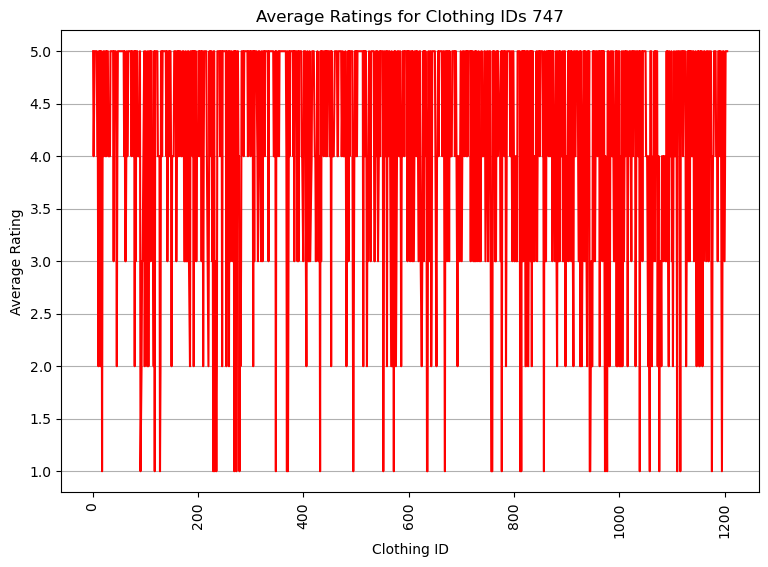

In [8]:

# Calculating the Combined Similarity
alpha = 0.7
combined_similarity = alpha * Clothing_similarity_df + (1 - alpha) * review_similarity_df

# Displaying recommendations for specific 'Clothing ID'
clothing_id = 747
recommendations = pd.DataFrame(data)
selected_recommendations = recommendations[recommendations['Clothing ID'] == clothing_id]
# Using 'recommendations' DataFrame and duplicating Clothing IDs 
recommendations = recommendations.drop_duplicates(subset='Clothing ID', keep='first')

# Pointing out the input 'clothing_id' from the all recommendations
recommendations = recommendations[recommendations['Clothing ID'] != clothing_id]

# Locating the recommendations based on 'Rating' by making ascending false 
located_recommendations = recommendations.sort_values(by='Rating', ascending=False)



print("Top Recommendations for Clothing ID", clothing_id)
print(located_recommendations [['Clothing ID', 'Age', 'Rating']])

# Grouping of the DataFrame by preference of 'Clothing ID' and exploring the average rating for each selected Clothing_id
average_ratings = recommendations.groupby('Clothing ID')['Rating'].mean().reset_index()

# Designing Bar Plot to visualise the recommended Clothing ID
plt.figure(figsize=(9, 6)) 
plt.plot(average_ratings['Clothing ID'], average_ratings['Rating'], markersize=4, color='red')
plt.xlabel('Clothing ID')
plt.ylabel('Average Rating')
plt.title(f'Average Ratings for Clothing IDs {clothing_id}')
plt.xticks(rotation=90) 
plt.grid(axis='y')  
plt.show()
